In [51]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm



In [226]:
X = [600, 0.15]
nb_points = 10
x = np.linspace(0, 1, nb_points)

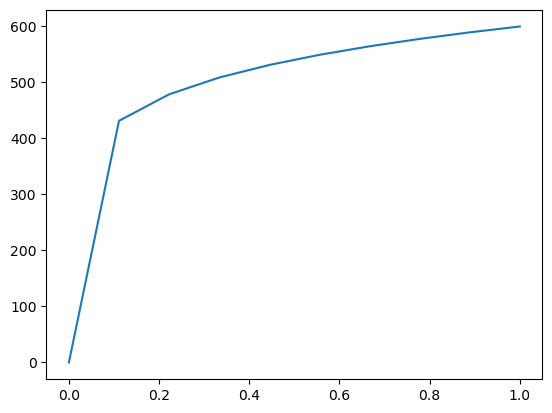

In [227]:
def compute_stress(X, x):
    return X[0] * x ** X[1]

y = compute_stress(X, x)

plt.plot(x, y)

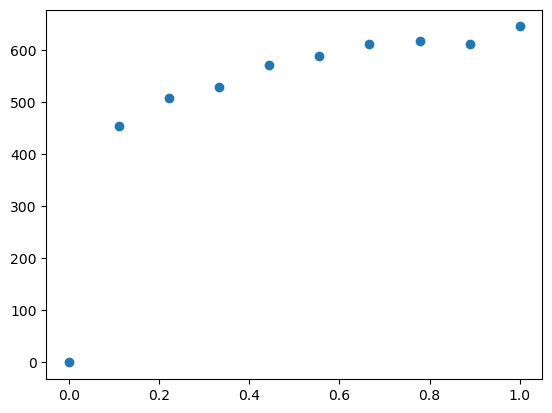

In [212]:
def generate_experimental_noisy_points(X, x):
    target = K * x ** n
    noise = 0.1 * np.random.random(nb_points) * target
    return target + noise

y_exp = generate_experimental_noisy_points(X, x)

plt.scatter(x, y_exp)

In [213]:
def mean_square_error(y, y_exp):
    residus = (y - y_exp)
    return np.sum(residus**2) / len(y)

mean_square_error(y, y_exp)

1134.082828147178

In [214]:
def scale_parameters(X):
    # return scaled parameters between [0, 1] for gradient convergence optimization
    K_scale = ( X[0] - 0 ) / ( 2000 - 0 )
    n_scale = ( X[1] - 0.01 ) / ( 0.5 - 0.01 )
    return np.array([K_scale, n_scale])

scale_parameters(np.array([600, 0.15]))

def unscale_parameters(X):
    # return unscaled parameters between [min, max] for computing stress
    K = X[0] * ( 2000 - 0 ) + 0
    n = X[1] * ( 0.5 - 0.01 ) + 0.01
    return np.array([K, n])
    
unscale_parameters(np.array([0.3, 0.2857142857142857]))



array([6.0e+02, 1.5e-01])

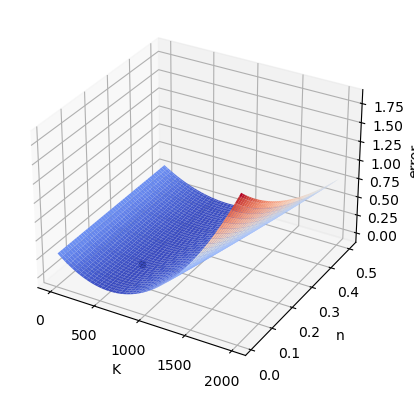

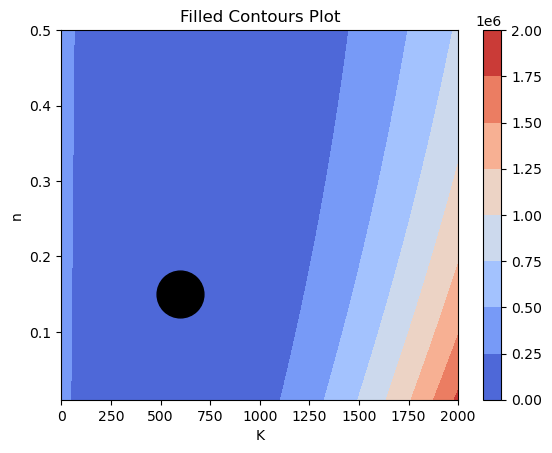

In [215]:
def plot_loss_function():
    K = np.linspace(0, 2000, 100)
    n = np.linspace(0.01, 0.5, 100)

    X, Y = np.meshgrid(K, n)
    zs = np.array(
        [mean_square_error(compute_stress([Ki, ni], x), y_exp) for Ki, ni in zip(np.ravel(X), np.ravel(Y))]
    )
    Z = zs.reshape(X.shape)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.scatter(600, 0.15, mean_square_error(compute_stress([600, 0.15], x), y_exp), color='black')
    ax.set_xlabel('K')
    ax.set_ylabel('n')
    ax.set_zlabel('error')
    
    fig2,ax2=plt.subplots(1,1)
    cp = ax2.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax2.scatter(600, 0.15, mean_square_error(compute_stress([600, 0.15], x), y_exp), color='black')
    fig2.colorbar(cp) # Add a colorbar to a plot
    ax2.set_title('Filled Contours Plot')
    ax2.set_xlabel('K')
    ax2.set_ylabel('n')
    
    plt.show()


plot_loss_function()

In [225]:
def residus(y, y_exp):
    return y - y_exp

residu = residus(y, y_exp)
print(residu)

[  0.         -23.78356545 -29.46216902 -20.33796543 -40.19624946
 -39.38133663 -47.11569176 -39.0085078  -22.41462363 -45.63904541]


In [217]:
def jacobian(residu, X):
    # parameters
    delta = 0.01
    J = np.zeros((len(residu), len(X)))
    # iteration for each parameter
    for i in range(len(X)):
        # finite difference for partial derivatives
        X2 = X.copy()  
        X2[i] = X2[i] + delta
        print(f'X2: {X2}')
        Y2 = compute_stress(unscale_parameters(X2), x)
        X3 = X.copy()  
        X3[i] = X3[i] - delta
        print(f'X3: {X3}')
        Y3 = compute_stress(unscale_parameters(X3), x)
        J[:, i] = (Y2 - Y3) / (2*delta)

    return J

jacobian(residu, scale_parameters([K, n]))

X2: [0.31       0.28571429]
X3: [0.29       0.28571429]
X2: [0.3        0.29571429]
X3: [0.3        0.27571429]


array([[   0.        ,    0.        ],
       [1438.44618665, -464.61560512],
       [1596.05597592, -352.89017707],
       [1696.14043443, -273.92122949],
       [1770.93498659, -211.1079452 ],
       [1831.21408412, -158.22561198],
       [1881.98564638, -112.17276229],
       [1926.00905789,  -71.15299617],
       [1964.97539814,  -34.02179469],
       [2000.        ,    0.        ]])

[0.9167444897857606, 0.4949381693695476]
error = 918598.1566850108
jacobian: [[    0.             0.        ]
 [ 1148.32537207 -1133.40175561]
 [ 1367.9838356   -924.26302189]
 [ 1515.47046957  -747.88761256]
 [ 1629.65986818  -593.64231983]
 [ 1724.12463984  -455.23199908]
 [ 1805.35861711  -328.82237495]
 [ 1877.01985533  -211.89986438]
 [ 1941.39083872  -102.71647518]
 [ 2000.             0.        ]]
gradient: [15346765.01315499 -3843055.25409841]
G: [[ 0.00000000e+00  4.58444620e-07  1.03090167e-05  1.77470924e-05
   2.39113625e-05  2.92585846e-05  3.40261435e-05  3.83558681e-05
   4.23403707e-05  4.60439988e-05]
 [ 0.00000000e+00 -1.69423754e-04 -1.28269742e-04 -9.44283430e-05
  -6.51721197e-05 -3.91027759e-05 -1.54092705e-05  6.42634994e-06
   2.67582883e-05  4.58412938e-05]]
np.dot(G, (y_exp-y): [-0.2652279   0.31195695]
next iteration: [0.65151659 0.80689512]


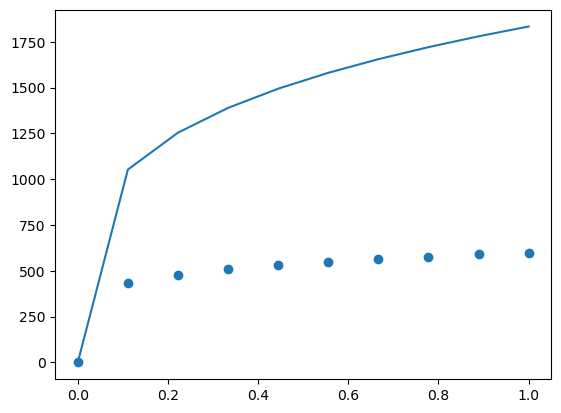

error = 213459.66362009113
jacobian: [[   0.            0.        ]
 [ 820.73034888 -575.70046749]
 [1087.00518184 -521.94338216]
 [1281.19502721 -449.34640851]
 [1439.66927377 -372.70720399]
 [1575.97013127 -295.7258401 ]
 [1696.86138136 -219.64504628]
 [1806.2803704  -144.91860441]
 [1906.75044838  -71.69653342]
 [2000.            0.        ]]
gradient: [6740078.0132689  -870744.75194571]
G: [[ 0.00000000e+00 -2.24420704e-06  7.17209818e-06  1.54475730e-05
   2.29346081e-05  2.98407465e-05  3.62951757e-05  4.23844707e-05
   4.81700530e-05  5.36974350e-05]
 [ 0.00000000e+00 -2.70336009e-04 -2.30630814e-04 -1.83986225e-04
  -1.36706738e-04 -9.01811563e-05 -4.47824974e-05 -5.85076196e-07
   4.24380626e-05  8.43486003e-05]]
np.dot(G, (y_exp-y): [-0.1442394   0.17697724]
next iteration: [0.50727719 0.98387236]


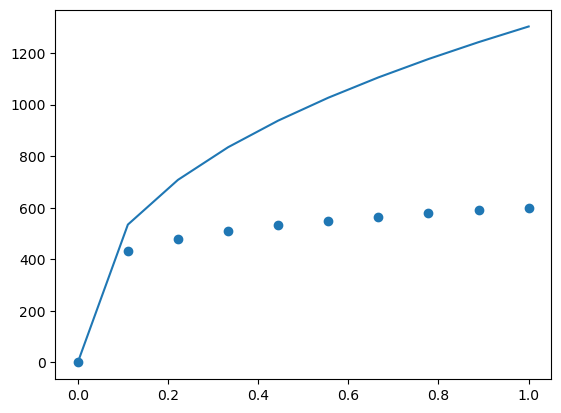

error = 56078.73905979631
jacobian: [[   0.            0.        ]
 [ 678.34352531 -370.48073384]
 [ 954.08216876 -356.69532333]
 [1164.76909755 -318.07220928]
 [1341.90531903 -270.48723899]
 [1497.65246361 -218.81253233]
 [1638.23399979 -165.10903429]
 [1767.34070396 -110.40255284]
 [1887.37400636  -55.25634125]
 [2000.            0.        ]]
gradient: [3080063.66364707 -181503.03599725]
G: [[ 0.00000000e+00 -3.46878563e-06  5.38783268e-06  1.39094050e-05
   2.20178259e-05  2.97614538e-05  3.71920330e-05  4.43525172e-05
   5.12773626e-05  5.79942954e-05]
 [ 0.00000000e+00 -3.66483319e-04 -3.34048621e-04 -2.78266750e-04
  -2.14690326e-04 -1.47936487e-04 -7.98909280e-05 -1.14551843e-05
   5.68991406e-05  1.24912369e-04]]
np.dot(G, (y_exp-y): [-0.07797707  0.00793162]
next iteration: [0.42930011 0.99180398]


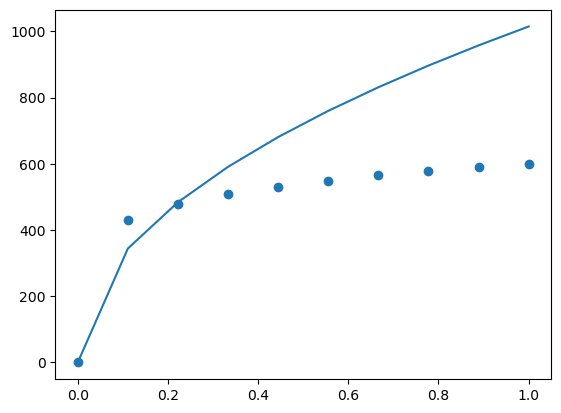

In [249]:
lamdba = 0.01
mu = 0.95

def levenberg_marquardt(y_exp, steps):
    X = [np.random.random(), np.random.random()]
    print(X)
    y = compute_stress(unscale_parameters(X), x)
    error = mean_square_error(y, y_exp)
    errors = [error]

    for step in range(steps):
        y = compute_stress(unscale_parameters(X), x)
        error = mean_square_error(y, y_exp)
        print(f'error = {error}')
        errors.append(error)
        delta = 0.001
        J = np.zeros((len(residu), len(X)))
        
        for i in range(len(X)):
            X2 = X.copy()  
            X2[i] = X2[i] + delta
            #print(f'X2: {X2}')
            Y2 = compute_stress(unscale_parameters(X2), x)
            #print(f'Y2: {Y2}')
            X3 = X.copy()  
            X3[i] = X3[i] - delta
            #print(f'X3: {X3}')
            Y3 = compute_stress(unscale_parameters(X3), x)
            J[:, i] = (Y2 - Y3) / (2*delta)
        print(f'jacobian: {J}')
        # next step
        print(f'gradient: {np.dot(np.transpose(J), y-y_exp)}')
        #X = X - lamdba * np.dot(np.transpose(J), y-y_exp)
        JJ = np.dot(np.transpose(J), J)
        G = np.dot(np.linalg.inv( JJ + mu * np.diag(np.diag(JJ)))  , np.transpose(J))
        print(f'G: {G}')
        print(f'np.dot(G, (y_exp-y): {np.dot(G, (y_exp-y))}')
        X = X + np.dot(G, (y_exp-y))
        print(f'next iteration: {X}')
        plt.plot(x, y)
        plt.scatter(x, y_exp)
        plt.show()

y = compute_stress(X, x)
levenberg_marquardt(y, 3)